# Effective conductivity of a fractured volume of rock

In the second step, I estimate the effective conductivity of a fractured volume of rock. I assume that the fractures are composed of ellipsoidal cracks that are filled with the proppant and fluid. The cracks can be preferentially aligned, resulting in an anisotropic conductivity, or randomly oriented, resulting in an isotropic conductivity. 

This notebook was used to generate Figures 2.8 and 2.9 in [my thesis](https://github.com/lheagy/phd-thesis)

In [1]:
import numpy as np
import properties
import matplotlib.pyplot as plt
import warnings

from string import ascii_lowercase
from SimPEG import Maps, Utils, versions
from SimPEG.Maps import IdentityMap
from matplotlib import rcParams
%matplotlib inline

In [2]:
rcParams['font.size'] = 12

## Effective conductivity of a volume of rock with preferentially aligned fractures

**Figure 2.8** Effective, anisotropic conductivity for a fractured rock with spheroidal cracks whose normal is oriented along the y-axis for five different aspect ratios, indicated by the legend. The black dashed lines show the upper and lower Wiener Bounds, which are identical the volume-weighted arithemtic and harmonic averages of the conductivity of the rock (0.1 S/m) and proppant-fluid mixture (2500 S/m). The black dash-dot lines are the anisotropic Hashin-Shtrikman upper and lower bounds computed using an aspect ratio of $10^{-5}$. Panels (a) and (c) show the full range $0 \leq \varphi \leq 1$, and panels (b) and (d) zoom in to $0 \leq \varphi \leq 0.005$. Note that in (b), any curve that deviates from the lower bound is the $\sigma_{x, z}$ component; all $\sigma_x$ values lie on the lower bound for the concentration range shown.

In [3]:
scemt = Maps.SelfConsistentEffectiveMedium(
    sigma0=1e-1, sigma1=2500, alpha1=1./100, 
    orientation0= np.r_[0.,0.,1.], orientation1=np.r_[0., 1., 0.],
    random = False, maxIter=100
)

In [4]:
n = 200
phi_frac = 0.005
phi = np.hstack([np.linspace(0., phi_frac, n), np.linspace(phi_frac, 1., n)[1:]])
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
sx = np.zeros((len(phi), len(alphas)))
sy = np.zeros((len(phi), len(alphas)))
wl = np.zeros((len(phi), len(alphas)))
wu = np.zeros((len(phi), len(alphas)))
hl = np.zeros((len(phi), len(alphas)))
hu = np.zeros((len(phi), len(alphas)))

for j, a in enumerate(alphas):
    scemt.alpha1 = a
    for i, p in enumerate(phi):
        se = scemt * np.r_[p]
        w = scemt.wiener_bounds(p)
        scemt.alpha1 = alphas[0]
        h = scemt.hashin_shtrikman_bounds_anisotropic(p)
        scemt.alpha1 = a
        
        sx[i, j] = se[0, 0]
        sy[i, j] = se[1, 1]
        
        wl[i, j] = w[0]
        wu[i, j] = w[1]
        
        hl[i, j] = h[0][1,1]
        hu[i, j] = h[1][0, 0]

/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:778: RuntimeWarning: divide by zero encountered in double_scalars
  np.linalg.inv(sigma_min*I + (sigma_min-sigma_max)/phi_max*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:778: RuntimeWarning: invalid value encountered in multiply
  np.linalg.inv(sigma_min*I + (sigma_min-sigma_max)/phi_max*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:896: UserWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached')
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:785: RuntimeWarning: divide by zero encountered in double_scalars
  np.linalg.inv(sigma_max*I + (sigma_max-sigma_min)/phi_min*amax)
/Users/lindseyjh/git/python_symlinks/SimPEG/Maps.py:785: RuntimeWarning: invalid value encountered in multiply
  np.linalg.inv(sigma_max*I + (sigma_max-sigma_min)/phi_min*amax)


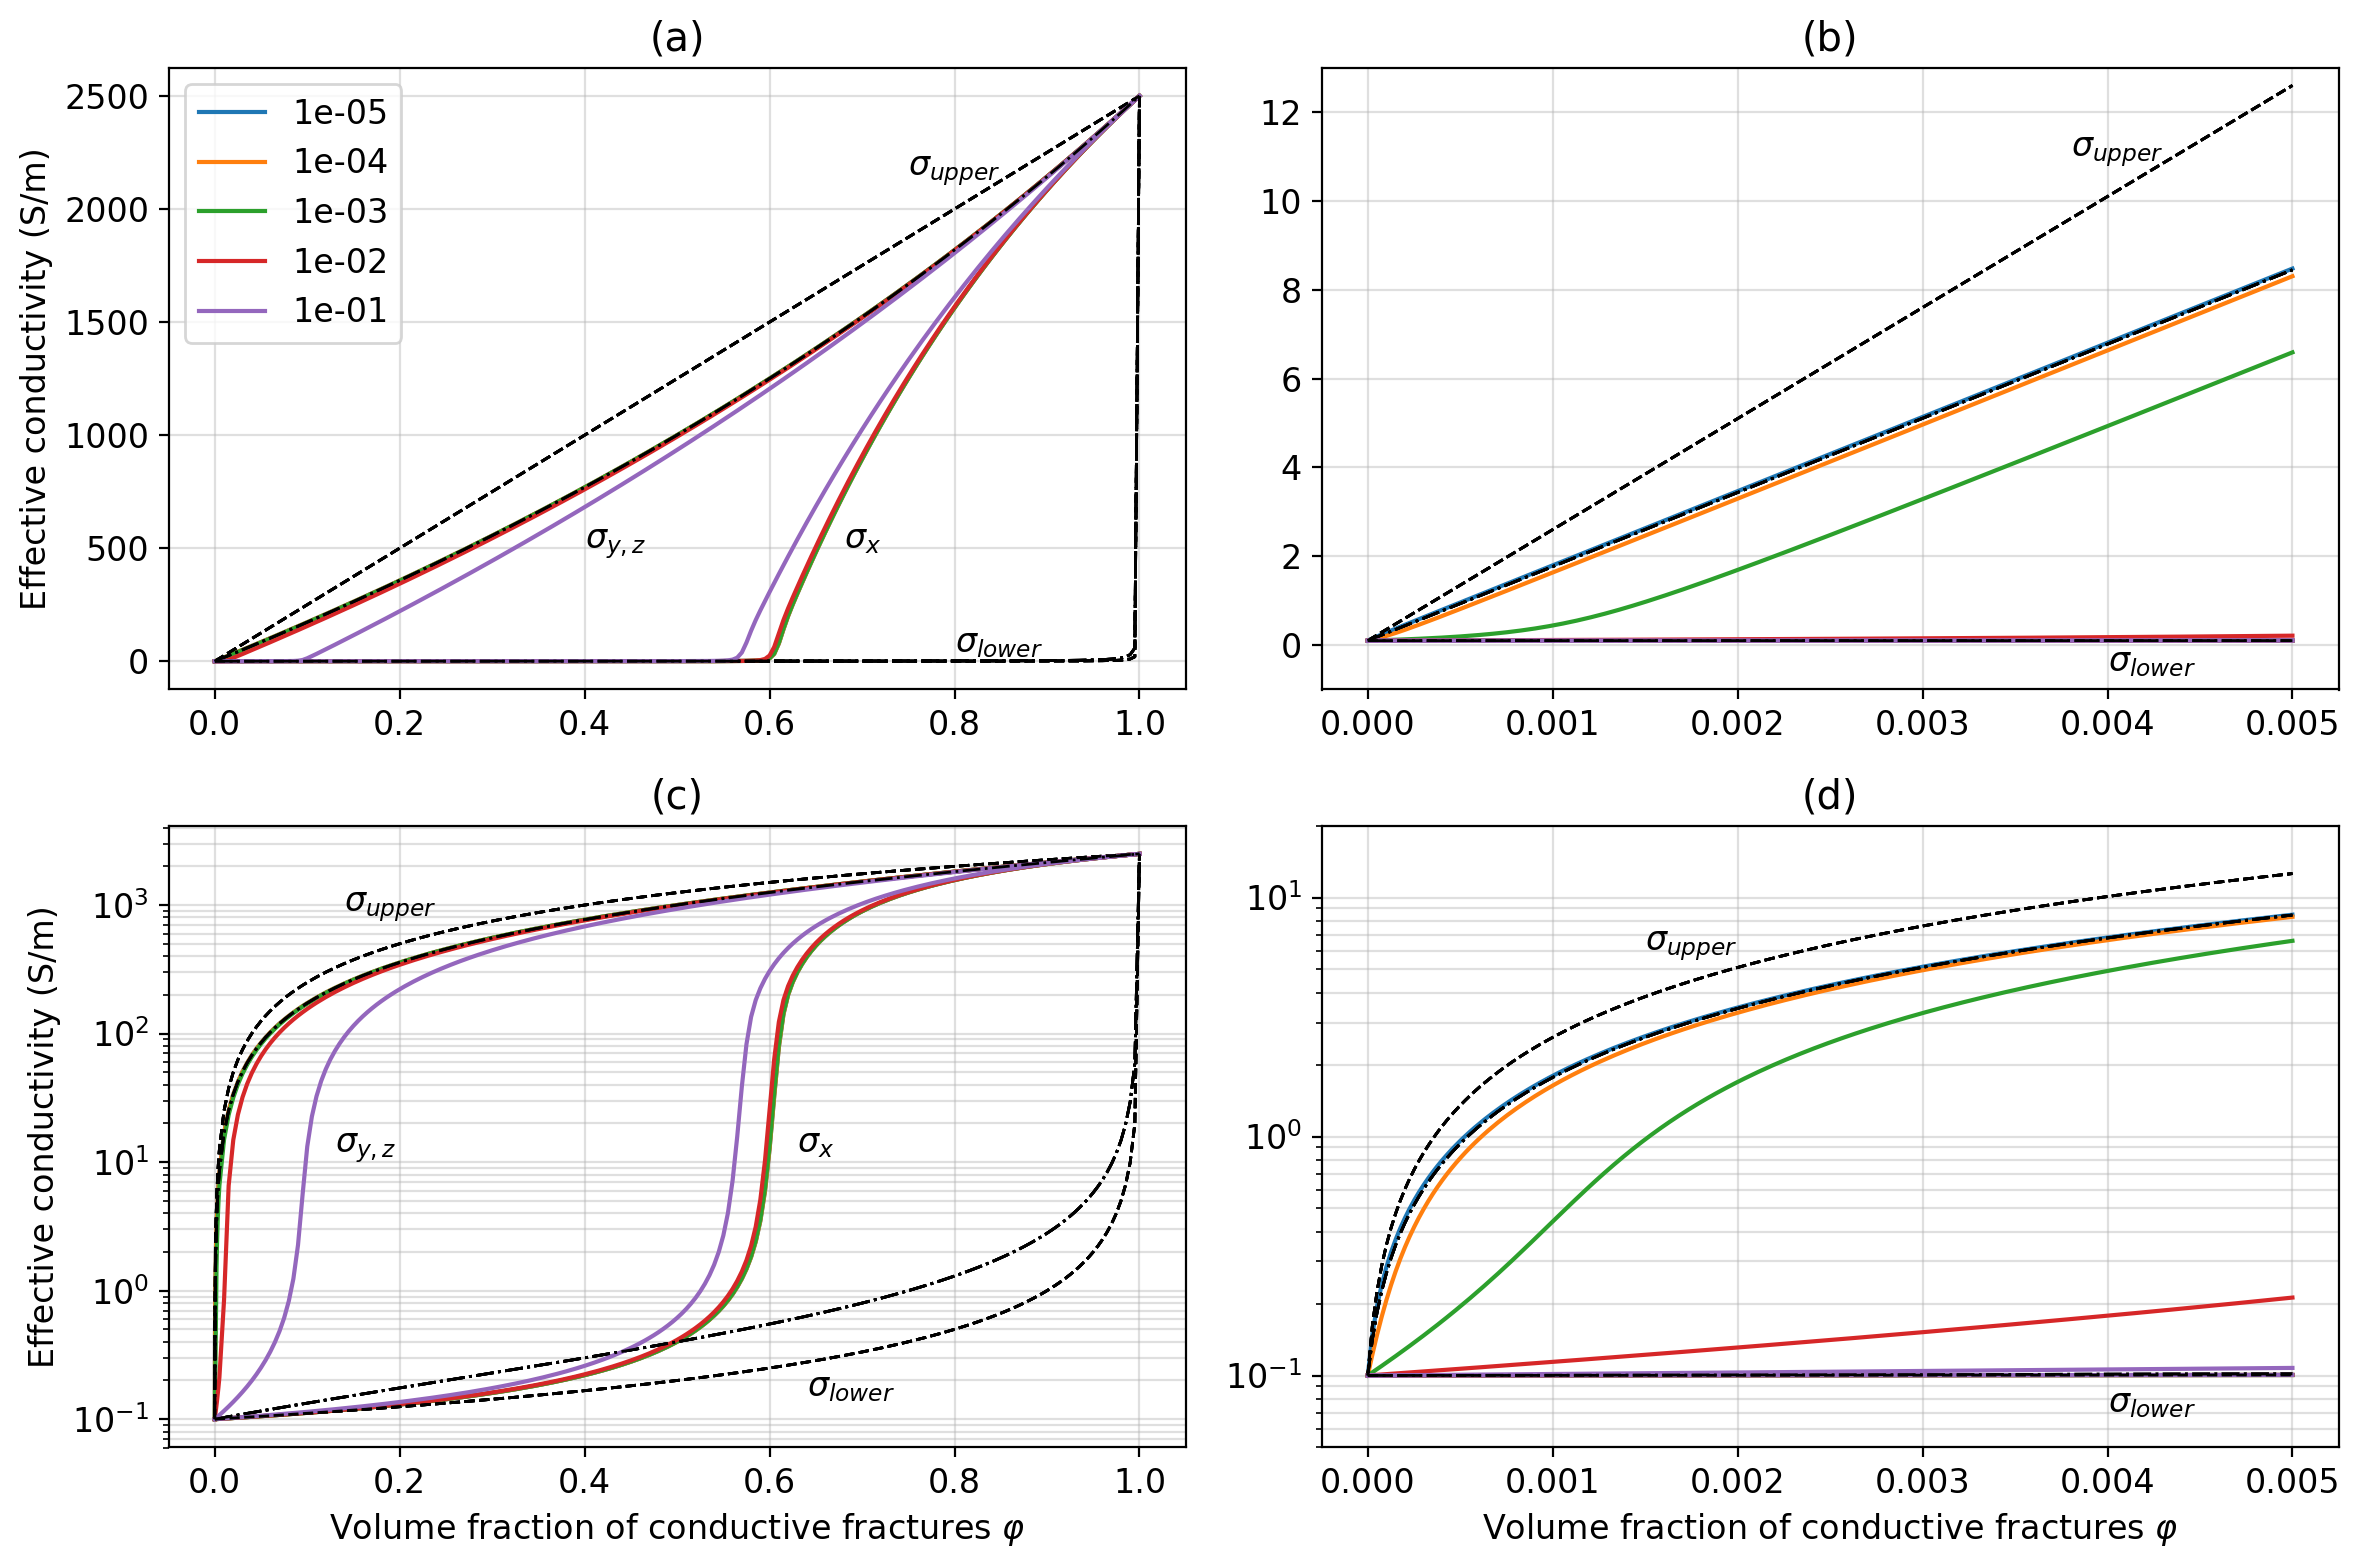

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=200)

for i in range(2):
    for j, alp in enumerate(alphas[:-1]):
        if i == 0: 
            inds = np.ones(len(phi), dtype=bool)
        elif i == 1: 
            inds = phi <= phi_frac
        
        for k, plt_type in enumerate(["plot", "semilogy"]):
            getattr(ax[k, i], plt_type)(phi[inds], sx[inds, j], "C{}".format(j), label="{:1.0e}".format(alp))
            getattr(ax[k, i], plt_type)(phi[inds], sy[inds, j], "C{}".format(j))
            getattr(ax[k, i], plt_type)(phi[inds], wl[inds, 0], 'k--', lw=1)
            getattr(ax[k, i], plt_type)(phi[inds], wu[inds, 0], 'k--', lw=1)
            getattr(ax[k, i], plt_type)(phi[inds], hl[inds, 0], 'k-.', lw=1)
            getattr(ax[k, i], plt_type)(phi[inds], hu[inds, 0], 'k-.', lw=1)
        
            ax[k, i].grid(which="both", alpha=0.4)

        ax[1, i].set_xlabel('Volume fraction of conductive fractures $\\varphi$')


[a.set_title("({})".format(ascii_lowercase[i])) for i, a in enumerate(ax.flatten())]
    
ax[0, 0].set_ylabel('Effective conductivity (S/m)')
ax[0, 0].annotate("$\sigma_{upper}$", (0.75, 2150))
ax[0, 0].annotate("$\sigma_{lower}$", (0.8, 40))
ax[0, 0].annotate("$\sigma_{y, z}$", (0.4, 500))
ax[0, 0].annotate("$\sigma_{x}$", (0.68, 500))

ax[0, 1].set_ylim([-1, 13])
ax[0, 1].annotate("$\sigma_{upper}$", (0.0038, 11))
ax[0, 1].annotate("$\sigma_{lower}$", (0.004, -0.6))


ax[1, 0].set_ylabel('Effective conductivity (S/m)')
ax[1, 0].annotate("$\sigma_{upper}$", (0.14, 900))
ax[1, 0].annotate("$\sigma_{lower}$", (0.64, 1.5e-1))
ax[1, 0].annotate("$\sigma_{y, z}$", (0.13, 12))
ax[1, 0].annotate("$\sigma_{x}$", (0.63, 12))

ax[1, 1].set_ylim([5e-2, 2e1])
ax[1, 1].annotate("$\sigma_{upper}$", (0.0015, 6))
ax[1, 1].annotate("$\sigma_{lower}$", (0.004, 0.7e-1))

ax[0, 0].legend()
# ax[1].legend(bbox_to_anchor=[1.02, 1.])

plt.tight_layout()

fig.savefig("../figures/aligned_fractures", dpi=200, bbox_inches="tight")

## Randomly oriented fractures

**Figure 2.9** Effective, isotropic conductivity for a fractured rock with randomly oriented spheroidal cracks for five different aspect ratios, indicated by the legend. The black dashed lines show the upper and lower Wiener Bounds, which are identical the volume-weighted arithemtic and harmonic averages of the conductivity of the rock (0.1 S/m) and proppant-fluid mixture (2500 S/m).The black dash-dot lines are the isotropic Hashin-Shtrikman upper and lower bounds. The semi-transparent dotted lines show $\sigma_{x, z}$ from Figure 2.8. Panels (a) and (c) shows the full range $0 \leq \varphi \leq 1$, and panels (b) and (d) zooms in to $0 \leq \varphi \leq 0.01$.

In [13]:
se = np.zeros((len(phi), len(alphas)))
wl = np.zeros((len(phi), len(alphas)))
wu = np.zeros((len(phi), len(alphas)))
hl = np.zeros((len(phi), len(alphas)))
hu = np.zeros((len(phi), len(alphas)))

scemt.random = True
scemt._sigstart = None
for j, a in enumerate(alphas):
    scemt.alpha1 = a
    for i, p in enumerate(phi):
        s = scemt*np.r_[p]
        w = scemt.wiener_bounds(p)
        h = scemt.hashin_shtrikman_bounds(p)
        
        se[i, j] = s
        
        wl[i, j] = w[0]
        wu[i, j] = w[1]
        
        hl[i, j] = h[0]
        hu[i, j] = h[1]

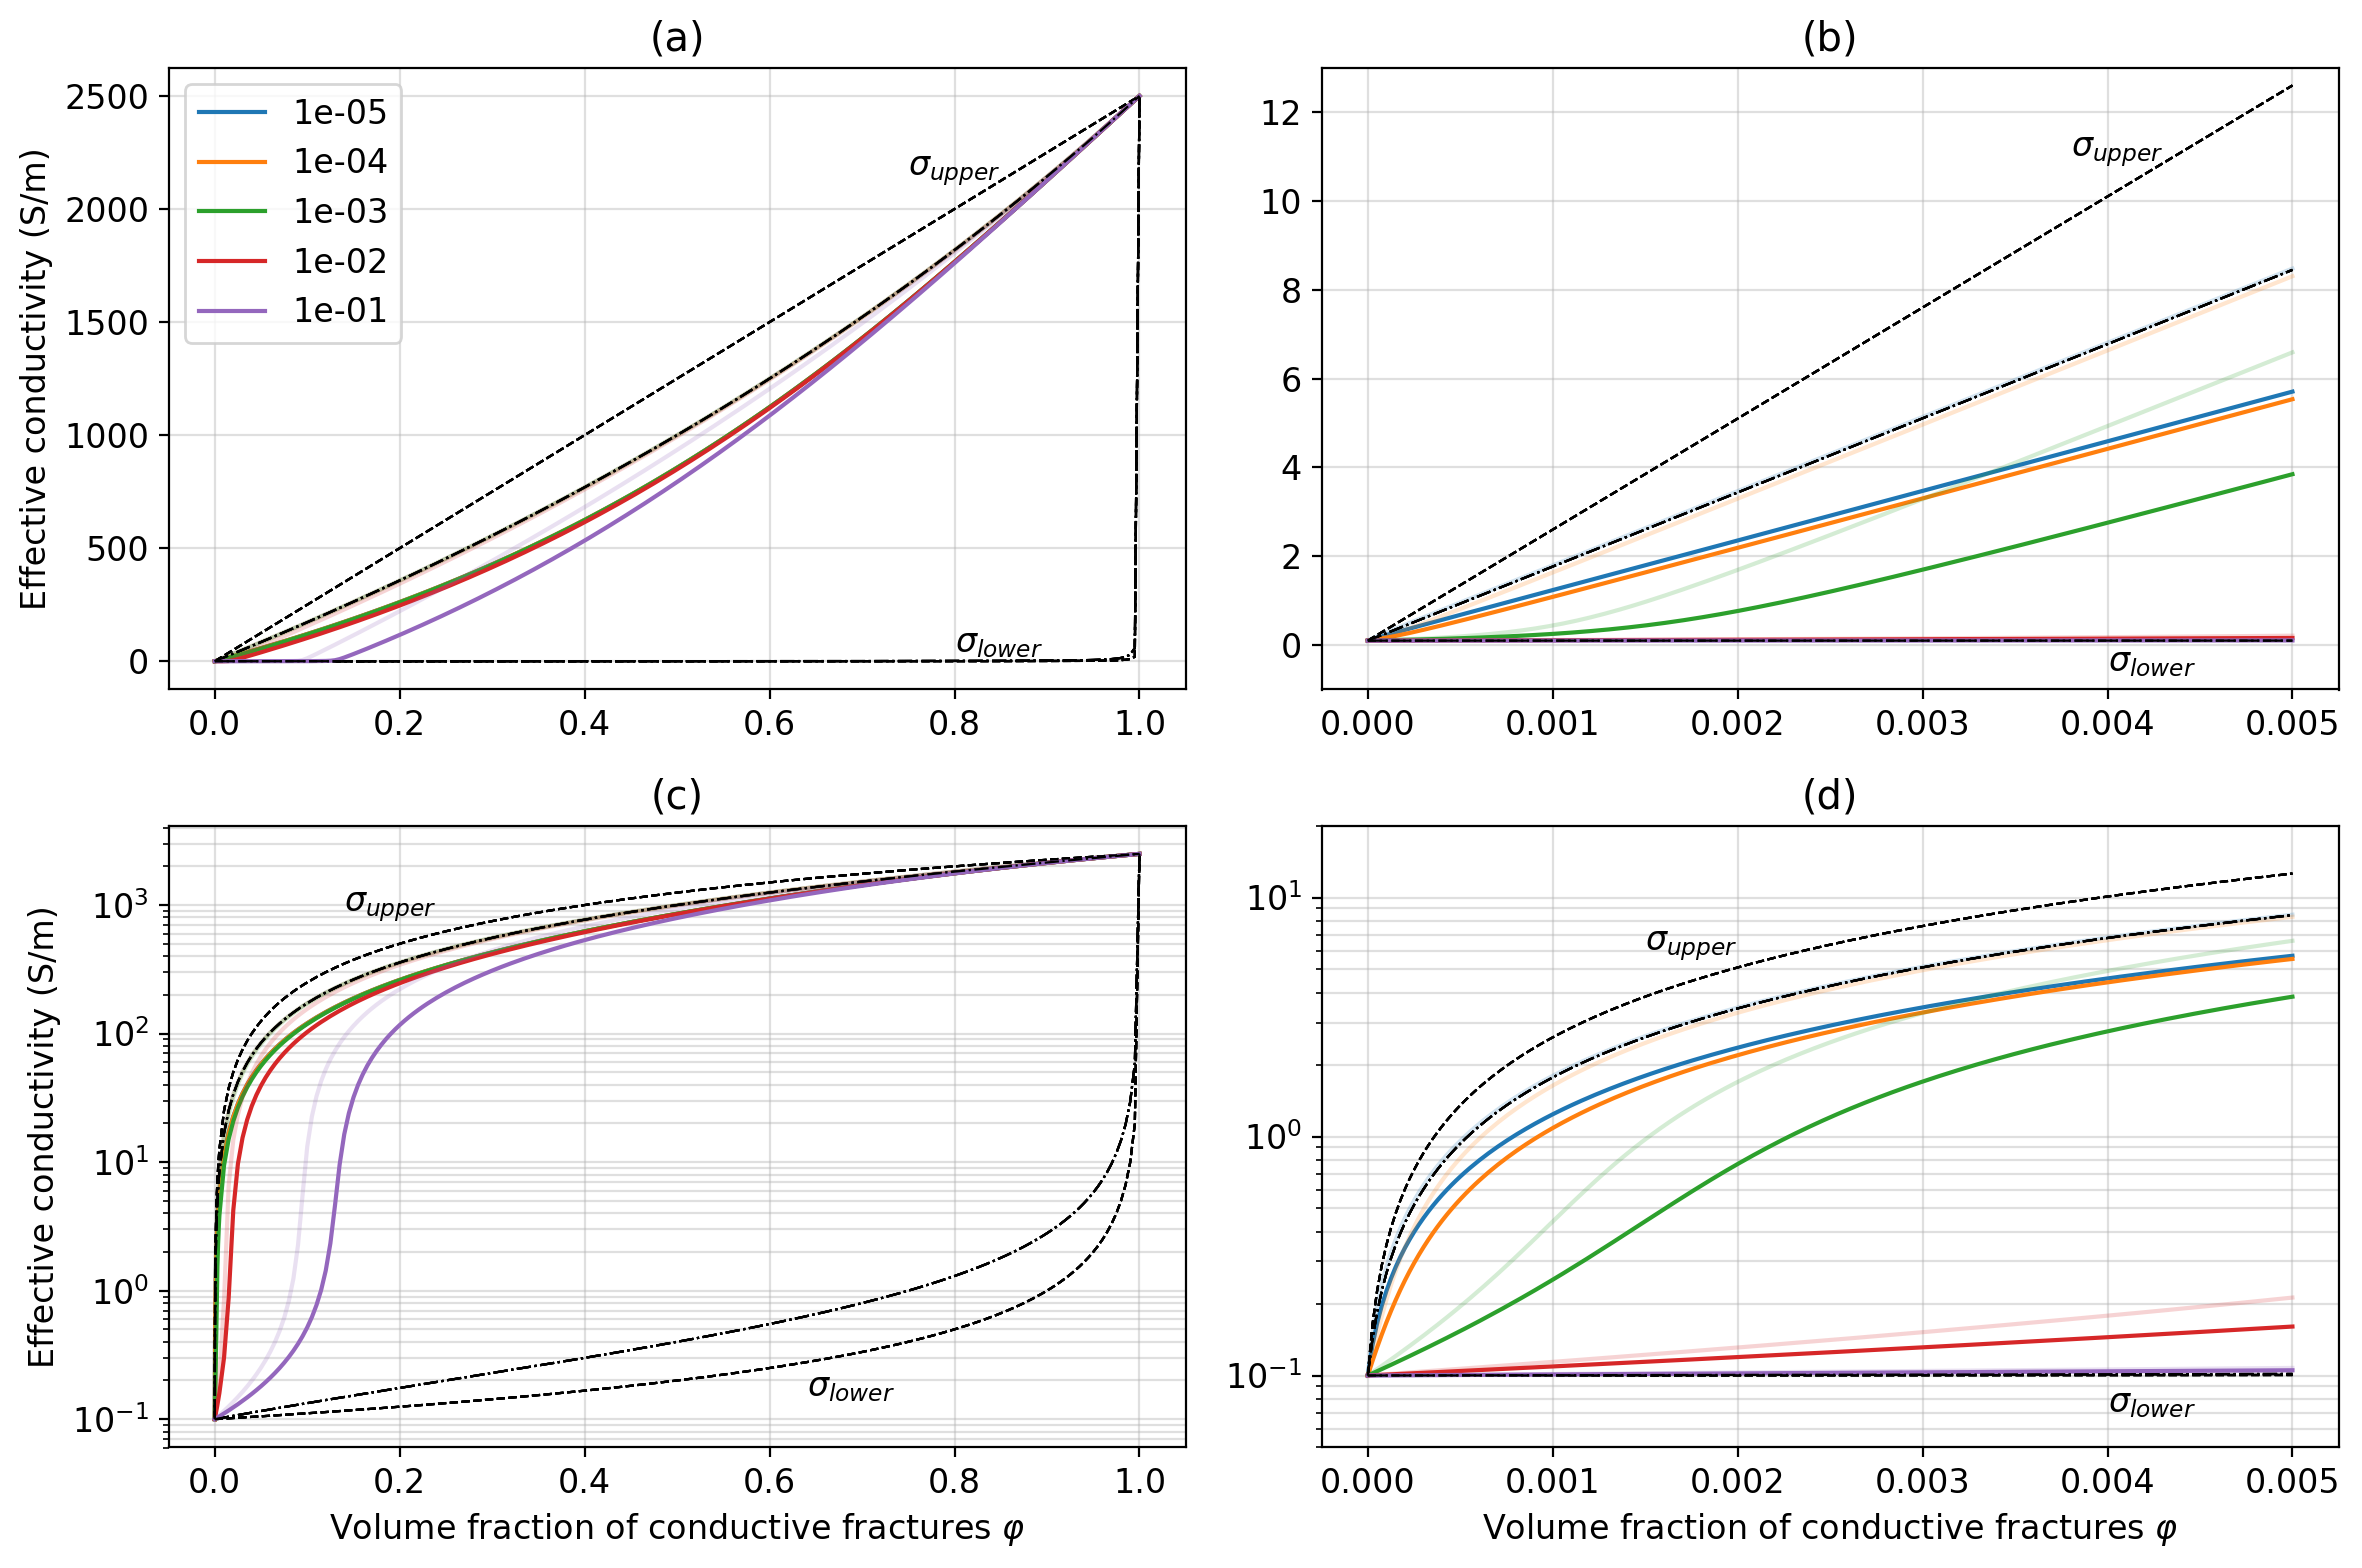

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8), dpi=200)

for i in range(2):
    for j, alp in enumerate(alphas[:-1]):
        if i == 0: 
            inds = np.ones(len(phi), dtype=bool)
        elif i == 1: 
            inds = phi <= phi_frac
        
        for k, plt_type in enumerate(["plot", "semilogy"]):
            getattr(ax[k, i], plt_type)(phi[inds], se[inds, j], "C{}".format(j), label="{:1.0e}".format(alp))
            getattr(ax[k, i], plt_type)(phi[inds], sx[inds, j], "C{}".format(j), alpha=0.2)
#             getattr(ax[k, i], plt_type)(phi[inds], sy[inds, j], "C{}".format(j), alpha=0.2))
            getattr(ax[k, i], plt_type)(phi[inds], wl[inds, 0], 'k--', lw=0.8)
            getattr(ax[k, i], plt_type)(phi[inds], wu[inds, 0], 'k--', lw=0.8)
            getattr(ax[k, i], plt_type)(phi[inds], hl[inds, 0], 'k-.', lw=0.8)
            getattr(ax[k, i], plt_type)(phi[inds], hu[inds, 0], 'k-.', lw=0.8)
        
            ax[k, i].grid(which="both", alpha=0.4)

        ax[1, i].set_xlabel('Volume fraction of conductive fractures $\\varphi$')


[a.set_title("({})".format(ascii_lowercase[i])) for i, a in enumerate(ax.flatten())]
    
ax[0, 0].set_ylabel('Effective conductivity (S/m)')
ax[0, 0].annotate("$\sigma_{upper}$", (0.75, 2150))
ax[0, 0].annotate("$\sigma_{lower}$", (0.8, 40))

ax[0, 1].set_ylim([-1, 13])
ax[0, 1].annotate("$\sigma_{upper}$", (0.0038, 11))
ax[0, 1].annotate("$\sigma_{lower}$", (0.004, -0.6))


ax[1, 0].set_ylabel('Effective conductivity (S/m)')
ax[1, 0].annotate("$\sigma_{upper}$", (0.14, 900))
ax[1, 0].annotate("$\sigma_{lower}$", (0.64, 1.5e-1))

ax[1, 1].set_ylim([5e-2, 2e1])
ax[1, 1].annotate("$\sigma_{upper}$", (0.0015, 6))
ax[1, 1].annotate("$\sigma_{lower}$", (0.004, 0.7e-1))

ax[0, 0].legend()
# ax[1].legend(bbox_to_anchor=[1.02, 1.])

plt.tight_layout()

fig.savefig("../figures/random_fractures", dpi=200, bbox_inches="tight")

In [15]:
i = 30
phi[i]

0.0007537688442211055

In [9]:
sx[i, 0]

1.3837295869965152

In [10]:
sy[i, 0]

0.1000754698614586

In [11]:
se[i, 0]

0.9638737177384514